In [1]:
import random
import random
import matplotlib.pyplot as plt

class Perceptron:

    def __init__(self, input_count):
        self.weights = []
        self.k = 0.01
        for n in range(input_count):
            self.weights.append(random.uniform(-1, 1))

    def FeedForward(self, inputs):
        sigma = 0
        for i, e in enumerate(inputs):
            sigma += e * self.weights[i]
        return self.Activate(sigma)

    def Activate(self, sigma):
        if sigma > 0:
            return 1
        else:
            return -1

    def Train(self, inputs, desired):
        guess = self.FeedForward(inputs)
        error_delta = desired - guess
        for i, w in enumerate(self.weights):
            self.weights[i] += error_delta * inputs[i] * self.k

In [2]:
class Inputs:

    def __init__(self, x, y, ans):
        self.inputs = []
        self.inputs.append(x)
        self.inputs.append(y)
        self.inputs.append(1)
        self.answer = ans

In [3]:
def f(x):
    return 2*x+1

def Training_Set(width, height, train_points):
    training = []
    for i in range(train_points):
        x = random.uniform(-width, width)
        y = random.uniform(-height, height)
        answer = 1
        if y < f(x):
            answer = -1
        training.append(Inputs(x, y, answer))
    return training

def Test_Set(width, height, test_points):
    testing = []
    for i in range(test_points):
        x = random.uniform(-width, width)
        y = random.uniform(-height, height)
        answer = 1
        if y < f(x):
            answer = -1
        testing.append(Inputs(x, y, answer))
    return testing

Score: 298 / 300 (99.33333333333333% accuracy)


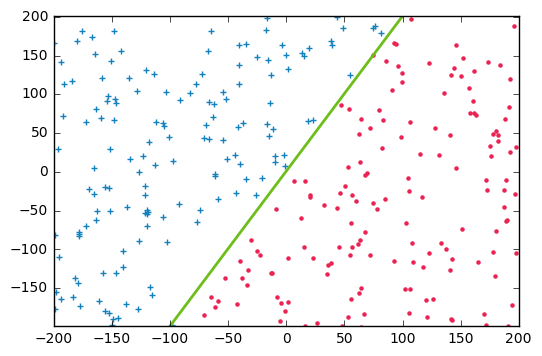

In [4]:
if __name__ == '__main__':
    _width  = 200
    _height = 200
    _training_points = 700
    _testing_points = 300

    training = Training_Set(_width, _height, _training_points)
    testing = Test_Set(_width, _height, _testing_points)
    ptron = Perceptron(3)

    score = []
    for t in training:
        ptron.Train(t.inputs, t.answer)

    data_ones_x = []
    data_ones_y = []
    data_minusones_x = []
    data_minusones_y = []
    for t in testing:
        guess = ptron.FeedForward(t.inputs)
        if guess > 0:
            data_ones_x.append(t.inputs[0])
            data_ones_y.append(t.inputs[1])
        else:
            data_minusones_x.append(t.inputs[0])
            data_minusones_y.append(t.inputs[1])

        correct = 1
        if t.inputs[1] < f(t.inputs[0]):
            correct = -1

        if guess == correct:
            score.append(1)
        else:
            score.append(0)

    print("Score:", sum(score), "/", len(score), "(" + str((float(sum(score))/float(len(score)))*100) + "% accuracy)")

    #Plot the true classification line
    xMin = -_width
    xMax = _width
    yMin = f(xMin)
    yMax = f(xMax)
    plt.plot([xMin, xMax], [yMin, yMax], linestyle='-', linewidth=2, color='#6dbe1b')

    axes = plt.gca()
    axes.set_xlim([xMin, xMax])
    axes.set_ylim([yMin/2, yMax/2])

    #Plot 1 & -1 scores
    plt.scatter(data_ones_x, data_ones_y, marker='+', color='#1381be')
    plt.scatter(data_minusones_x, data_minusones_y, marker='.', color='#eb2352')

    fig = plt.gcf()
    fig.canvas.set_window_title('Perceptron Linear Classifier')
    plt.show()